# 4. New Customers List

# - All the code and in depth analysis is below the description!

# New Customers List: Data Quality Issues and resolving methods used

- **First Name:** This column includes the first names of our new customers. No Issue in this column.
- **Last Name:** This column inlucdes the last names of our new customers. There were some missing values in this column, but we didn't remove those records because the first names were enough to identify a customer. Data Quality Issue was **Incompleteness**.

- **Gender:** This column includes the genders of our customers. M for Males, F for Females and U for Unknown. No Issue in this column.

- **Past 3 Years Bike Related Purchases:** No Issue in this column.

- **DOB:** This column includes the Date of Birth for each customers. We calculated an age column by subtracting the their DOB from the current year. No Issues in this column as well.

- **Job Title:** This column includes the job titles of the customers. There were There are 105 blank values, 10.5% of the total dataset. We can simply remove them but we will be loosing valuable information for later analysis. The Data Quality Issue is **Incompelteness**. Rather than dropping it, We will fill those empty values with "Untitled" which I believe is a good way to approach this rather than dropping the values which will make us loose valuable information.

- **Job Industry Category:** This column includes job categories of the customers. There are 165 blank values, 16.5% of the total dataset. The Data Quality Issue expirenced here is also **Incompleteness**. Removing the missing values will make us loose valuable information. We will do same thing as the Job title column, Fill those empty values with "Untitled".

- **Wealth Segment:** This column includes wealth segments given by the company to its customers. No Issues in this column.

- **Deceased Indicator:** This column tells us whether the customers are alive or not. In our new customers list all of the customers were indicated as "N", meaning all of them are alive so it is not adding any information. So this column has **Irrelevant** information so we removed the whole column.

- **Owns Car:** This column tells us whether a customer have a car or not. No Issues in this column.
- **Tenure:** This column refers to the number of months that a customer has been subscribed for.

- **Address:** This column includes the addresses of each customers. There was no issue in this column.

- **Postcode:** This column includes the post code for each customers. There was no issue in this column.

- **State:** This column includes the states where each customers are in. Unlike our existing customers address dataset the values in this column are pretty much consistent so there was no Issue.

- **Country:** This column includes the country of each customers. This column is **Irrelevant** becacuse all the customers are from one country and It won't add any value. So we filtered this column out.

- **Property Valuation:** This column includes about an estimate of the worth of a property of the customer at the time of the valuation. As far as domain knowledge there is no problem in this field

In [1]:
# Importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The path where the file is
file = r"Dataset/KPMG_VI_New_raw_data_update_final.xlsx"

new_cust = pd.read_excel(file, sheet_name="NewCustomerList") # New Customers List dataset

In [3]:
# Viewing the top 5 rows
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.05,1.3125,1.640625,1.394531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.99,0.9900,1.237500,1.051875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.52,0.5200,0.520000,0.520000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.99,1.2375,1.237500,1.237500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.48,0.4800,0.600000,0.600000,4,4,1.703125


In [4]:
# Bottom 5 rows
new_cust.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.85,0.8500,0.850000,0.850000,996,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.58,0.5800,0.725000,0.616250,997,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.362500,997,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.42,0.5250,0.525000,0.446250,997,997,0.357
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.85,1.0625,1.328125,1.128906,1000,1000,0.340


In [5]:
# This will give us information about the data types of the columns and the null values in them.
# Also the memory usage.
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [6]:
# To get an in depth statstical analysis of the numerical columns we have. won't make much sense for some columns..
new_cust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.750480,0.842850,0.946453,0.874481,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.211728,0.257307,0.303579,0.290193,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.623750,0.700000,0.629000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.760000,0.837500,0.923437,0.850000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.037500,1.164844,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [7]:
# Shape of our dataset
new_cust.shape

(1000, 23)

### A little clean up..

In [8]:
pd.options.display.max_columns = 23

In [9]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1.05,1.3125,1.640625,1.394531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.99,0.9900,1.237500,1.051875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.52,0.5200,0.520000,0.520000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.99,1.2375,1.237500,1.237500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.48,0.4800,0.600000,0.600000,4,4,1.703125


- __There are columns without any descriptions about what they represent, we are going to drop those columns.__

In [10]:
new_cust.drop(["Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], axis=1, inplace=True)

In [11]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


### I. First Name and Last Name

In [12]:
# This column includes the first names of each customers.
new_cust["first_name"]

0        Chickie
1          Morly
2        Ardelis
3         Lucine
4        Melinda
         ...    
995    Ferdinand
996         Burk
997     Melloney
998       Dickie
999        Sylas
Name: first_name, Length: 1000, dtype: object

In [13]:
# Includes last names of each customers
new_cust["last_name"]

0        Brister
1         Genery
2      Forrester
3          Stutt
4         Hadlee
         ...    
995    Romanetti
996      Wortley
997        Temby
998      Cubbini
999      Duffill
Name: last_name, Length: 1000, dtype: object

In [14]:
print("There are " + str(new_cust["first_name"].isna().sum()) + " empty values in the 'First Name' column")
print("There are " + str(new_cust["last_name"].isna().sum()) + " empty values in the 'Last Name' column")

There are 0 empty values in the 'First Name' column
There are 29 empty values in the 'Last Name' column


- __Eventhough we have some missing values in the last name column we won't remove the those records because they have a corresponding First name which is enough to identify a customer.__

### II. Gender

In [15]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [16]:
# This Column includes the genders of each customers.
new_cust["gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
995      Male
996      Male
997    Female
998      Male
999      Male
Name: gender, Length: 1000, dtype: object

In [17]:
print("There are " + str(new_cust["gender"].isna().sum()) + " empty values in the 'Gender' column")

There are 0 empty values in the 'Gender' column


In [18]:
new_cust["gender"].unique()

array(['Male', 'Female', 'U'], dtype=object)

- __`Unlike the customer demographic dataset there is no inconsistency issue in this gender column. But in the customer demographic dataset we encoded all Male to M and Female to F, we will do that here aswell.`__

In [19]:
# For Male
male_index = new_cust.loc[new_cust["gender"] == "Male"].index
new_cust.loc[male_index, "gender"] = "M"

In [20]:
# For female
female_index = new_cust.loc[new_cust["gender"] == "Female"].index
new_cust.loc[female_index, "gender"] = "F"

In [21]:
# Let's Check
new_cust["gender"].unique()

array(['M', 'F', 'U'], dtype=object)

In [22]:
# To see how many customers are in each gender group.
(new_cust["gender"].value_counts(normalize=True)) * 100

F    51.3
M    47.0
U     1.7
Name: gender, dtype: float64

- **Visualizing the gender groups**.

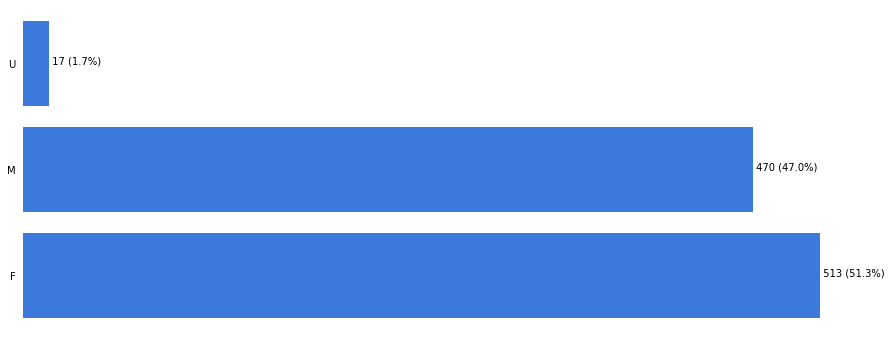

In [23]:
plt.rcParams["figure.figsize"] = 15, 6

fig, ax = plt.subplots()

ax.barh(new_cust["gender"].value_counts().index, new_cust["gender"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(new_cust["gender"].value_counts().values):
    ax.text(value, index, s=f" {value} ({value/(len(new_cust)/100)}%)")
    

plt.show()

- __`Similar to our existing customers, Majority of our new customers are Females consisting of 51% of the total new customers then followed by Males with 47% and finally Unknown gender group with 1.7%.`__

### III. Past 3 Years Bike Related Purchases 

In [24]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [25]:
new_cust["past_3_years_bike_related_purchases"]

0      86
1      69
2      10
3      64
4      34
       ..
995    60
996    22
997    17
998    30
999    56
Name: past_3_years_bike_related_purchases, Length: 1000, dtype: int64

In [26]:
print("There are " + str(new_cust["past_3_years_bike_related_purchases"].isna().sum()) +
      " empty values in the 'past_3_years_bike_related_purchases' column.")

There are 0 empty values in the 'past_3_years_bike_related_purchases' column.


### IV. DOB (Date of Birth)

In [27]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [28]:
print("There are " + str(new_cust["DOB"].isna().sum()) + " empty values in the 'Date of Birth' column")

There are 17 empty values in the 'Date of Birth' column


In [29]:
print("The empty values make up " + str((new_cust["DOB"].isna().sum() / len(new_cust))*100) +
      "% of the total data so we will remove those missing values.")

The empty values make up 1.7000000000000002% of the total data so we will remove those missing values.


In [30]:
new_cust.dropna(subset=["DOB"], inplace=True)

In [31]:
# Checking...
new_cust["DOB"].isna().sum()

0

In [32]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


- __Now we can augment the "DOB" column to create an Age column which will be of great help in later analysis.__

In [33]:
new_cust.insert(loc=5, column="age", value=(2020 - new_cust["DOB"].dt.year))

In [34]:
# We have now added the age column
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


- __We will look at the upper and lower bounds of the age column to see if there are any outliers.__

In [35]:
new_cust["age"].max()

82

In [36]:
new_cust["age"].min()

18

- `This kinda looks good, but let's do some visualizations.`

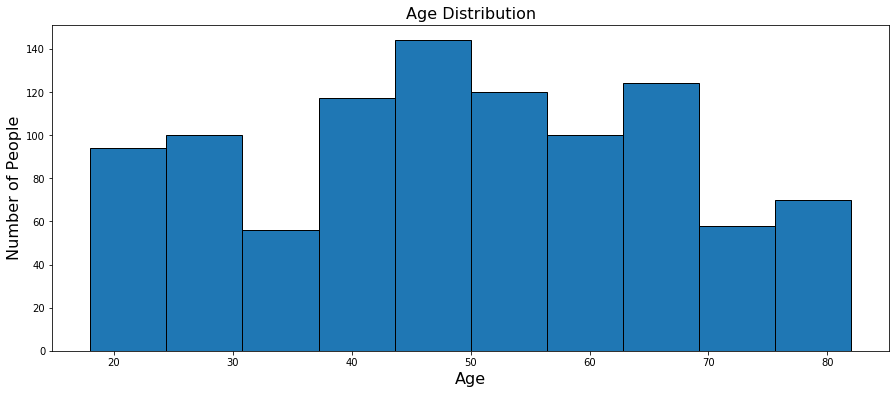

In [37]:
new_cust["age"].hist(grid=False, bins=10, edgecolor="black")

plt.xlabel("Age", size=16)
plt.ylabel("Number of People", size=16)
plt.title("Age Distribution", size=16)

plt.show()

- ___Despite the customers in the previous dataset in this one there aren't outliers in the age column.___

- __Inserting an age category column.__

In [38]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [39]:
# Initialize a column where will assign the age categories.
new_cust.insert(loc=6, column="age_categories", value=1)

In [40]:
# Indexes of various age ranges
age_less_than_20 = (new_cust.loc[new_cust["age"] < 20].index)

age_20_to_30 = (new_cust.loc[(new_cust["age"] >= 20) & (new_cust["age"] < 30)].index)

age_30_to_40 = (new_cust.loc[(new_cust["age"] >= 30) & (new_cust["age"] < 40)].index)

age_40_to_50 = (new_cust.loc[(new_cust["age"] >= 40) & (new_cust["age"] < 50)].index)

age_50_to_60 = (new_cust.loc[(new_cust["age"] >= 50) & (new_cust["age"] < 60)].index)

age_60_to_70 = (new_cust.loc[(new_cust["age"] >= 60) & (new_cust["age"] < 70)].index)

age_70_to_80 = (new_cust.loc[(new_cust["age"] >= 70) & (new_cust["age"] < 80)].index)

age_80_and_above = (new_cust.loc[new_cust["age"] >= 80].index)


In [41]:
# Assigning the age categories 

new_cust.loc[age_less_than_20, "age_categories"] = "Lessthan 20"

new_cust.loc[age_20_to_30, "age_categories"] = "20 to 30"

new_cust.loc[age_30_to_40, "age_categories"] = "30 to 40"

new_cust.loc[age_40_to_50, "age_categories"] = "40 to 50"

new_cust.loc[age_50_to_60, "age_categories"] = "50 to 60"

new_cust.loc[age_60_to_70, "age_categories"] = "60 to 70"

new_cust.loc[age_70_to_80, "age_categories"] = "70 to 80"

new_cust.loc[age_80_and_above, "age_categories"] = "Above 80"

In [42]:
new_cust["age_categories"].unique()

array(['60 to 70', '50 to 60', '40 to 50', '30 to 40', '20 to 30',
       'Above 80', '70 to 80', 'Lessthan 20'], dtype=object)

### V. Job Title and Job Industry Category

In [43]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [44]:
# There are 105 empty values in this column
new_cust["job_title"].isna().sum()

105

- __There are many ways we can approach this problem. We can simply remove those values in the column, We can also substitute the values with the most frequent value in the column.... But what we will do is fill those empty values with "Untitled" which I believe is a good way to approach this rather than dropping the values which will make us loose valuable information.__

In [45]:
index_of_nan_value_in_job_title = new_cust.loc[new_cust["job_title"].isna()].index

new_cust.loc[index_of_nan_value_in_job_title, "job_title"] = "Untitled"

In [46]:
# Checking..
new_cust["job_title"].isna().sum()

0

In [47]:
# There are 185 unique Job titles..
len(new_cust["job_title"].unique())

185

In [48]:
# We will look at the top 5 frequent job titles.
new_cust["job_title"].value_counts(normalize=True).head()

Untitled                 0.106816
Environmental Tech       0.014242
Software Consultant      0.014242
Associate Professor      0.014242
Chief Design Engineer    0.013225
Name: job_title, dtype: float64

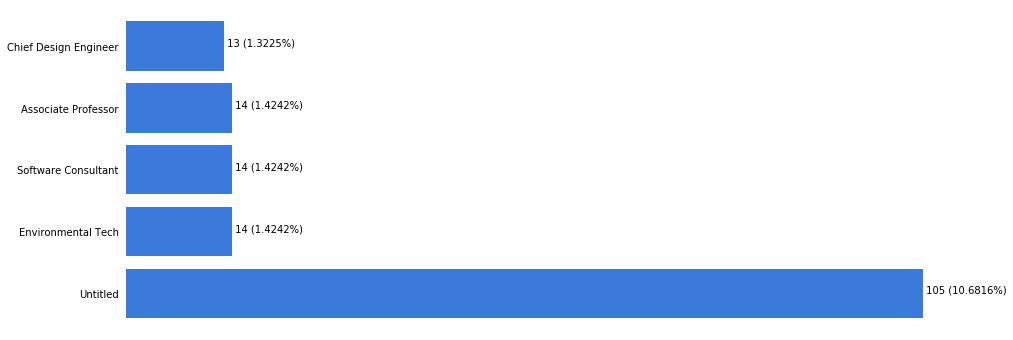

In [49]:
# Visualizing the 5 frequent Job titles.

fig, ax = plt.subplots()

ax.barh(new_cust["job_title"].value_counts().head(5).index,
        new_cust["job_title"].value_counts().head(5).values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(new_cust["job_title"].value_counts().head(5).values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(new_cust)/100), 4)}%)")


plt.show()

- __The majority of the customers didn't provide their Job Title, 10% of the new customers. The other job titles were mentioned pretty evenly.__

### - __**`Job Industry Category`**__

In [50]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [51]:
# There are 165 empty values in this column.
new_cust["job_industry_category"].isna().sum()

165

- __We will deal with the missing values same as we did for the Job title column.__

In [52]:
index_of_nan_value_in_job_industry_category = new_cust.loc[new_cust["job_industry_category"].isna()].index

new_cust.loc[index_of_nan_value_in_job_industry_category, "job_industry_category"] = "Untitled"

In [53]:
# Checking..
new_cust["job_industry_category"].isna().sum()

0

In [54]:
new_cust["job_industry_category"].value_counts(normalize=True)

Financial Services    0.205493
Manufacturing         0.202442
Untitled              0.167854
Health                0.154629
Retail                0.079349
Property              0.065107
IT                    0.036623
Entertainment         0.036623
Argiculture           0.026450
Telecommunications    0.025432
Name: job_industry_category, dtype: float64

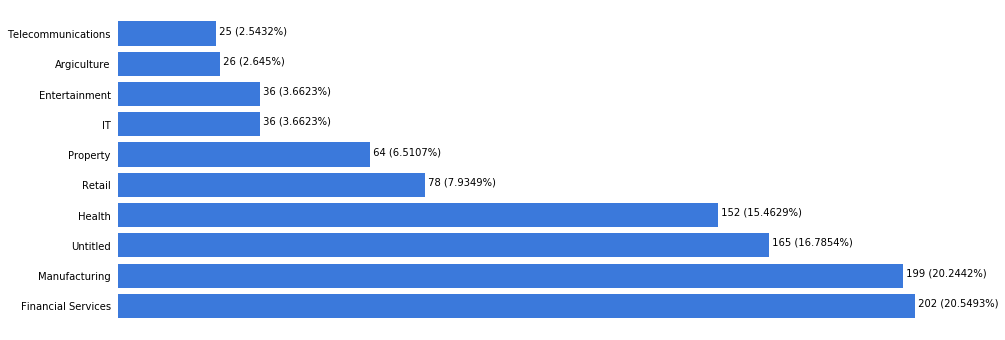

In [55]:
fig, ax = plt.subplots()

ax.barh(new_cust["job_industry_category"].value_counts().index,
        new_cust["job_industry_category"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(new_cust["job_industry_category"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(new_cust)/100), 4)}%)")


plt.show()

- __The commonly selected job industry category from our new customers list is Financial Services with a slight difference to Manufacturing by 0.3% difference followed by Untitled job industries. Small part of our customers are from a job inudstry of Telecommunication, Agriculture, IT, Entertainment and Property which all together make 20% of the total new customers list. The top 5 frequently mentioned job industries all together make 80% of the total new customer list.__

### VI. Wealth Segment

In [56]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [57]:
# There is no missing values in the wealth segment.
new_cust["wealth_segment"].isna().sum()

0

- __There are no missing values in the wealth segment column, its obvious because the company is the one that gives the customers the segments using various information about the customer like how much they spend, their salary, age and many other factors.__

In [58]:
# There are 3 unique segments given to customers.
new_cust["wealth_segment"].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [59]:
new_cust["wealth_segment"].value_counts(normalize=True)

Mass Customer        0.507630
High Net Worth       0.253306
Affluent Customer    0.239064
Name: wealth_segment, dtype: float64

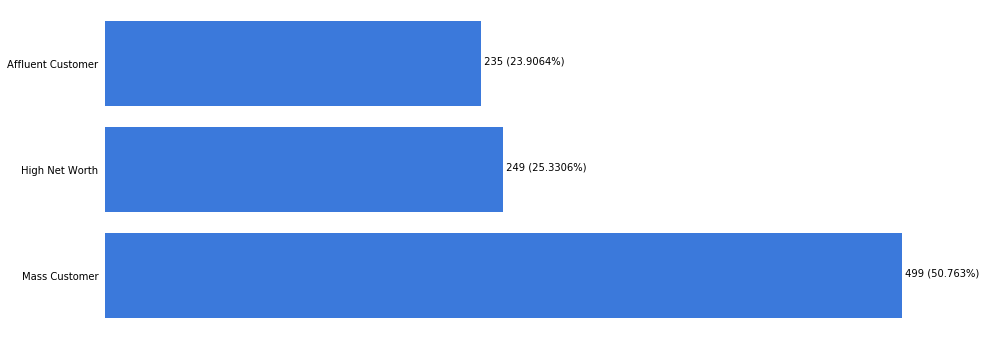

In [60]:
fig, ax = plt.subplots()

ax.barh(new_cust["wealth_segment"].value_counts().index,
        new_cust["wealth_segment"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(new_cust["wealth_segment"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(new_cust)/100), 4)}%)")


plt.show()

- __The `Mass Customer` segment refers to a large, undifferentiated group of customers with widely varied backgrounds.__
- __The `High-net-worth` segment refers to customers whose investible wealth exceed a given amount. Typically, these individuals are defined as holding financial assets with a value greater than USD 1 million.__
- __The `Affluent Customer` segment refers to customers having over USD 100,000 in household income and USD 250,000 or more in assets.__

- __Similar to our existing customers we have seen before the majority of our new customers are segmented as Mass customer, 51% followed by High net worth customers, 25% and finally Affluent customers, 24% of the customers.__

### VII. Deceased Indicator

In [61]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [62]:
# There are 0 empty values in this column.
new_cust["deceased_indicator"].isna().sum()

0

In [63]:
new_cust["deceased_indicator"].unique()

array(['N'], dtype=object)

- __All the values in the deceased indicator are `N` meaning all the customers in the dataset are alive, this doesn't give us any additional information so we will remove the whole column.__

In [64]:
new_cust.drop("deceased_indicator", axis=1, inplace=True)

In [65]:
# Checking...
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


### VIII. Owns Car and Tenure

In [66]:
# There are 0 empty values in this column
new_cust["owns_car"].isna().sum()

0

- __The `Owns Car` column tells us whether the customer owns a car.__

In [67]:
(new_cust["owns_car"].value_counts(normalize=True))*100

No     50.559512
Yes    49.440488
Name: owns_car, dtype: float64

- __Customers who own a car are proportional to those who don't.__

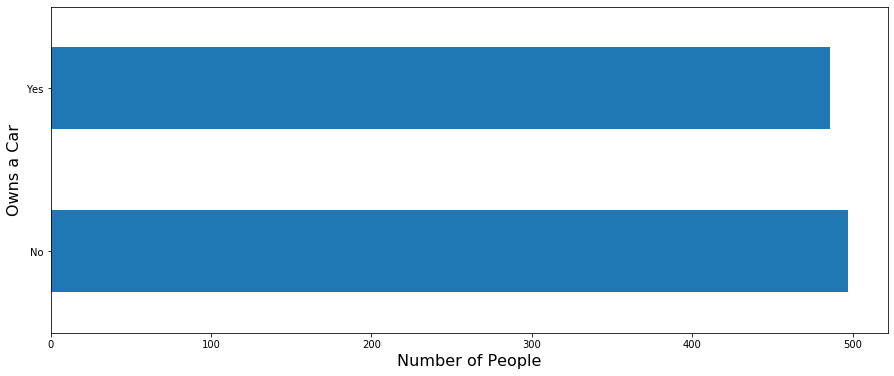

In [68]:
new_cust["owns_car"].value_counts().plot(kind="barh")

plt.xlabel("Number of People", size=16)
plt.ylabel("Owns a Car", size=16)

plt.show()

## - **__`Tenure`__**

In [69]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [70]:
# There are 0 empty values in this column
new_cust["tenure"].isna().sum()

0

- __`Tenure` refers to the number of months that a customer has been subscribed for.__

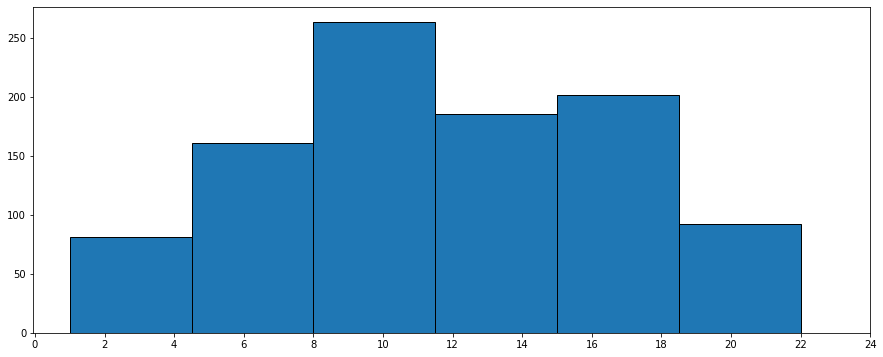

In [71]:
new_cust["tenure"].hist(grid=False, edgecolor="black", bins=6)

plt.xticks(ticks=[i for i in range(0, 25, 2)])

plt.show()

- __Majority of the customers have a tenure in the range 8-12.__

### IX. Address

In [72]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [73]:
new_cust["address"]

0              45 Shopko Center
1             14 Mccormick Park
2           5 Colorado Crossing
3            207 Annamark Plaza
4             115 Montana Place
                 ...           
995                 2 Sloan Way
996           04 Union Crossing
997    33475 Fair Oaks Junction
998          57666 Victoria Way
999          21875 Grover Drive
Name: address, Length: 983, dtype: object

- __This column includes the addresses of each individual customers.__

In [74]:
# No empty values in this column.
new_cust["address"].isna().sum()

0

In [75]:
# There are no customers having similar addresses.
new_cust["address"].duplicated().sum()

0

### X. Postcode

In [76]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [77]:
# There are 0 empty values in this column.
new_cust["postcode"].isna().sum()

0

In [78]:
new_cust["postcode"]

0      4500
1      2113
2      3505
3      4814
4      2093
       ... 
995    2200
996    2196
997    4702
998    4215
999    2010
Name: postcode, Length: 983, dtype: int64

- ___Different customers can have similar postcodes and as you can see below there are 515 unique postcodes.___

In [79]:
len(new_cust["postcode"].unique())

515

### XI. State and Country

In [80]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [81]:
# There are 0 empty values in this column.
new_cust["state"].isna().sum()

0

In [82]:
new_cust["state"]

0      QLD
1      NSW
2      VIC
3      QLD
4      NSW
      ... 
995    NSW
996    NSW
997    QLD
998    QLD
999    NSW
Name: state, Length: 983, dtype: object

- ___The State column tells us what state the customer lives in.___

In [83]:
new_cust["state"].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

- __We don't have an inconsistency issue unlike the existing customers address where we did.__

In [84]:
new_cust["state"].value_counts(normalize=True)

NSW    0.507630
VIC    0.262462
QLD    0.229908
Name: state, dtype: float64

- **Let's visualize it.**

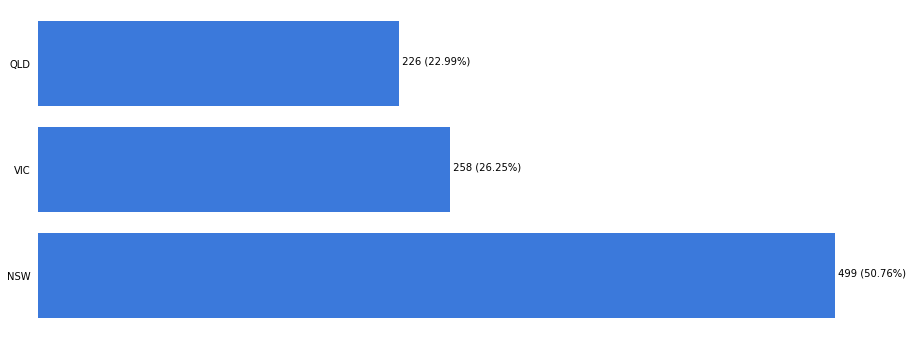

In [85]:
plt.rcParams["figure.figsize"] = 15, 6

fig, ax = plt.subplots()

ax.barh(new_cust["state"].value_counts().index, new_cust["state"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(new_cust["state"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(new_cust)/100), 2)}%)")
    

plt.show()

- __`Like our existing customers majority of the new customers are from New South Wales, 50% of the customers followed by Victoria, 26% and finally Queensland, 22% of the customers.`__

## - __`Country`__

In [86]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [87]:
# There are 0 empty values in this column.
new_cust["country"].isna().sum()

0

In [88]:
new_cust["country"].unique()

array(['Australia'], dtype=object)

- ***`Looks like all of our customers are from Australia, this column doesn't give us any additional information. It is irrelevant, we will remove the column.`***

In [89]:
new_cust.drop("country", axis=1, inplace=True)

### VII. Property Valuation

In [90]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,9,4,1.703125


In [91]:
# There are0 empty values in this column.
new_cust["property_valuation"].isna().sum()

0

In [92]:
new_cust["property_valuation"]

0       6
1      11
2       5
3       1
4       9
       ..
995     7
996    10
997     2
998     2
999     9
Name: property_valuation, Length: 983, dtype: int64

- ___Property Valuation is an estimate of the worth of a property at the time of the valuation.___

In [93]:
print("minimum, maximum")
new_cust["property_valuation"].min(), new_cust["property_valuation"].max()

minimum, maximum


(1, 12)

### XIII. Rank and Value

In [94]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,9,4,1.703125


- **The rank column is the rank of the `value` column which is after the rank column.**

In [95]:
# There are 0 empty values in this column
new_cust["Rank"].isna().sum()

0

### - **`Value`**

In [96]:
# There are 0 empty values in this column.
new_cust["Value"].isna().sum()

0

In [97]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,63,60 to 70,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,50,50 to 60,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,46,40 to 50,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,41,40 to 50,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,55,50 to 60,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,9,4,1.703125


# New Customers List: Data Quality Issues and resolving methods used

- **First Name:** This column includes the first names of our new customers. No Issue in this column.
- **Last Name:** This column inlucdes the last names of our new customers. There were some missing values in this column, but we didn't remove those records because the first names were enough to identify a customer. Data Quality Issue was **Incompleteness**.

- **Gender:** This column includes the genders of our customers. M for Males, F for Females and U for Unknown. No Issue in this column.

- **Past 3 Years Bike Related Purchases:** No Issue in this column.

- **DOB:** This column includes the Date of Birth for each customers. We calculated an age column by subtracting the their DOB from the current year. And also added an age category column. No Issues in this column as well.

- **Job Title:** This column includes the job titles of the customers. There were There are 105 blank values, 10.5% of the total dataset. We can simply remove them but we will be loosing valuable information for later analysis. The Data Quality Issue is **Incompelteness**. Rather than dropping it, We will fill those empty values with "Untitled" which I believe is a good way to approach this rather than dropping the values which will make us loose valuable information.

- **Job Industry Category:** This column includes job categories of the customers. There are 165 blank values, 16.5% of the total dataset. The Data Quality Issue expirenced here is also **Incompleteness**. Removing the missing values will make us loose valuable information. We will do same thing as the Job title column, Fill those empty values with "Untitled".

- **Wealth Segment:** This column includes wealth segments given by the company to its customers. No Issues in this column.

- **Deceased Indicator:** This column tells us whether the customers are alive or not. In our new customers list all of the customers were indicated as "N", meaning all of them are alive so it is not adding any information. So this column has **Irrelevant** information so we removed the whole column.

- **Owns Car:** This column tells us whether a customer have a car or not. No Issues in this column.
- **Tenure:** This column refers to the number of months that a customer has been subscribed for.

- **Address:** This column includes the addresses of each customers. There was no issue in this column.

- **Postcode:** This column includes the post code for each customers. There was no issue in this column.

- **State:** This column includes the states where each customers are in. Unlike our existing customers address dataset the values in this column are pretty much consistent so there was no Issue.

- **Country:** This column includes the country of each customers. This column is **Irrelevant** becacuse all the customers are from one country and It won't add any value. So we filtered this column out.

- **Property Valuation:** This column includes about an estimate of the worth of a property of the customer at the time of the valuation. As far as domain knowledge there is no problem in this field

In [99]:
new_cust.to_csv(r"Exported Datasets/new_customers.csv", index=False) # Exporting the dataset